# ep8 analyzing income statements data

In [1]:
import pandas as pd
df_income_recent_var = pd.read_csv('income_cleansed.csv')
df_income_recent_var.set_index(['symbol'],inplace=True)
df_income_recent_var

,acceptedDate,revenue,costOfRevenue,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,otherExpenses,operatingExpenses,interestExpense,...,interestExpense_var,depreciationAndAmortization_var,ebitda_var,operatingIncome_var,totalOtherIncomeExpensesNet_var,incomeBeforeTax_var,incomeTaxExpense_var,netIncome_var,eps_var,weightedAverageShsOut_var
symbol,,,,,,,,,,,,,,,,,,,,,
A,2020-05-29 20:10:41,1.238000e-09,0.470921,0.529079,0.159128,0.287561,0.000000,0.029079,0.446688,0.016155,...,0.000000,-0.002423,-0.081583,-0.091276,0.011309,-0.079160,-0.001616,-0.077544,-0.30567,-0.000808
AAL,2020-07-23 07:04:41,1.622000e-09,3.049322,-2.049322,0.000000,0.026510,0.026510,0.043773,0.336005,0.156597,...,-0.001850,0.000000,-1.320592,-1.394575,1.569667,0.142417,0.035142,0.107275,0.44000,0.001908
AAP,2020-08-18 16:40:43,2.501380e-09,0.561438,0.438562,0.000000,0.329438,0.000000,0.000000,0.333482,-0.005366,...,-0.000471,-0.008770,0.067655,0.073727,0.003640,0.076896,0.018380,0.058516,2.11322,-0.000039
AAPL,2020-07-30 19:29:09,5.968500e-08,0.620005,0.379995,0.079719,0.080942,0.000000,0.000771,0.160660,0.011678,...,-0.001005,-0.000570,-0.001541,0.003988,-0.002480,0.000034,-0.000034,0.000067,0.00754,-0.003344
ABBV,2020-08-04 09:55:42,1.042500e-08,0.355971,0.644029,0.233573,0.338321,0.000000,-0.076930,0.000000,0.060624,...,0.006619,0.000000,-0.259185,-0.273477,-0.072326,-0.363645,-0.004029,-0.359520,-2.48000,0.015923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,2020-08-05 17:26:47,1.198000e-09,0.541736,0.458264,0.000000,0.216194,0.220367,-0.001669,0.030050,0.110184,...,0.011686,0.000000,-0.082638,-0.082638,0.229549,0.135225,0.032554,0.102671,0.40000,0.000835
ZBH,2020-08-04 20:07:47,1.226100e-09,0.346220,0.653780,0.071528,0.542370,0.000000,0.003099,0.007911,0.044042,...,0.002528,0.000000,-0.253160,-0.256015,0.488541,0.229998,-0.015415,0.246228,1.46000,0.000245
ZBRA,2020-07-28 16:03:27,9.560000e-10,0.561715,0.438285,0.102510,0.191423,0.114017,0.019874,0.313808,0.014644,...,-0.032427,0.000000,-0.032427,-0.033473,0.000000,0.000000,-0.011506,0.011506,0.22454,-0.000672


In [3]:
import pandas as pd
import datetime

def read_stock(row):    
    txt_date = row['acceptedDate'].split(' ')[0]        
    symbol = row['symbol']    
    if '-' in txt_date:
        yyyy,mm,dd = [int(i) for i in txt_date.split('-')]
        today = datetime.date(yyyy,mm,dd) + datetime.timedelta(days=90)  # this is the last day in the dataframe, the length is always 300 days
        p = today - datetime.date(1969, 12, 31)    
        p = str(int(p.total_seconds()))    
        url = 'https://query1.finance.yahoo.com/v7/finance/download/{}?P={}?period1={}&period2={}&interval=1d&events=history&includeAdjustedClose=true'
        url = url.format(symbol, symbol,p,p)
        try:
            df = pd.read_csv(url)
            p = df[df['Date']==txt_date]['Close'].values
            return [symbol,((df.iloc[-1]['Close']-p)/p)[0]]
        
        except:
            pass
        
# read_stock(df_income_1Q_var['acceptedDate'].reset_index().dropna().iloc[0])
df_gain = df_income_recent_var['acceptedDate'].reset_index().dropna().apply(read_stock,axis=1)

In [4]:
df_gain = list(filter(None,list(df_gain)))
df_gain = pd.DataFrame(df_gain,columns=['symbol','quarterly gain'])
df_gain = df_gain.set_index(['symbol'])
df_gain

,quarterly gain
symbol,
A,0.123440
AAL,0.083263
AAP,-0.072398
AAPL,0.156045
ABBV,-0.064058
...,...
XYL,0.169814
YUM,0.063407
ZBH,0.014391


In [5]:
df_gain_income_recent_var = pd.concat([df_gain,df_income_recent_var],axis=1,join='inner')
df_gain_income_recent_var.head(10)

,quarterly gain,acceptedDate,revenue,costOfRevenue,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,otherExpenses,operatingExpenses,...,interestExpense_var,depreciationAndAmortization_var,ebitda_var,operatingIncome_var,totalOtherIncomeExpensesNet_var,incomeBeforeTax_var,incomeTaxExpense_var,netIncome_var,eps_var,weightedAverageShsOut_var
symbol,,,,,,,,,,,,,,,,,,,,,
A,0.123440,2020-05-29 20:10:41,1.238000e-09,0.470921,0.529079,0.159128,0.287561,0.000000,0.029079,0.446688,...,0.000000,-0.002423,-0.081583,-0.091276,0.011309,-0.079160,-0.001616,-0.077544,-0.305670,-0.000808
AAL,0.083263,2020-07-23 07:04:41,1.622000e-09,3.049322,-2.049322,0.000000,0.026510,0.026510,0.043773,0.336005,...,-0.001850,0.000000,-1.320592,-1.394575,1.569667,0.142417,0.035142,0.107275,0.440000,0.001908
AAP,-0.072398,2020-08-18 16:40:43,2.501380e-09,0.561438,0.438562,0.000000,0.329438,0.000000,0.000000,0.333482,...,-0.000471,-0.008770,0.067655,0.073727,0.003640,0.076896,0.018380,0.058516,2.113220,-0.000039
AAPL,0.156045,2020-07-30 19:29:09,5.968500e-08,0.620005,0.379995,0.079719,0.080942,0.000000,0.000771,0.160660,...,-0.001005,-0.000570,-0.001541,0.003988,-0.002480,0.000034,-0.000034,0.000067,0.007540,-0.003344
ABBV,-0.064058,2020-08-04 09:55:42,1.042500e-08,0.355971,0.644029,0.233573,0.338321,0.000000,-0.076930,0.000000,...,0.006619,0.000000,-0.259185,-0.273477,-0.072326,-0.363645,-0.004029,-0.359520,-2.480000,0.015923
ABC,-0.013043,2020-08-05 16:42:41,4.536678e-08,0.972982,0.027018,0.000000,0.014700,0.014700,-0.000024,0.000015,...,-0.000062,-0.000004,-0.003259,-0.003030,0.004595,0.001491,0.016564,-0.014787,-3.260000,-0.000038
ABMD,-0.154105,2020-08-06 16:01:51,1.648500e-10,0.218277,0.781723,0.159885,0.415190,0.000000,0.149305,0.000000,...,0.000000,0.000000,-0.144404,-0.145502,0.277519,0.132017,0.054431,0.077586,0.990000,0.273036
ABT,0.059110,2020-07-29 17:16:23,7.328000e-09,0.445278,0.554722,0.076965,0.310590,0.000000,-0.003002,0.000000,...,-0.000682,0.000000,-0.016512,-0.011736,-0.002320,-0.014602,-0.013646,-0.003684,-0.015553,0.000230
ACN,0.061338,2020-06-25 07:11:26,1.099131e-08,0.678956,0.321044,0.000000,0.165217,0.101735,0.678956,0.165217,...,-0.000328,0.000231,0.014835,0.020360,-0.002892,0.015577,0.015527,-0.000595,-0.034490,0.000739


In [25]:
s_gain_income_recent_var_corr = df_gain_income_recent_var.corr().iloc[1:]['quarterly gain']
s_gain_income_recent_var_corr.reset_index().sort_values(by=['quarterly gain'],key=lambda x:abs(x),ascending=False)

,index,quarterly gain
25,depreciationAndAmortization_var,0.125899
22,operatingExpenses_var,0.119594
27,operatingIncome_var,-0.106585
4,generalAndAdministrativeExpenses,0.102484
9,depreciationAndAmortization,-0.097539
26,ebitda_var,-0.077083
18,researchAndDevelopmentExpenses_var,0.076923
21,otherExpenses_var,-0.071603
3,researchAndDevelopmentExpenses,-0.069672
24,interestExpense_var,0.066960


One unexpected observation can be made from the list of correlation coefficient above.  It appears that the quarterly gain is highly correlated with the quarter-by-quarter variation of the `depreciationAndAmortization`.  Depreciation and Amortization does not impress as the one most influential factor to stock performance and thus this observation seems odd.  To make sure this is not an artifact generated by errors in the program, we spot-check for the correlation between quarterly gain and the quarter-by-quarter variation in the depreciation and amortization manually.  We will manually  calculate the quarterly gain by `AAPL` first.

In [26]:
read_stock(df_income_recent_var['acceptedDate'].reset_index().dropna().iloc[3])

['AAPL', 0.15604527173208696]

The quarterly gain calculated by the program matches the value calculated manually.  Next, we manually calculate the depreciation and amortization of AAPL and also the quaterly variation.  By looking up the `income_raw_1-200.csv` data, we found that the two latest quaterly depreciation and amortization of AAPL is: 2702000000 and 2752000000.  The most recent quarterly revenue is: 64698000000.  Therefore, the recent depreciation and amortization is:

$$2702000000/64698000000 = 0.04176$$

,which matches the value calculated by the program shown below.

In [27]:
df_income_recent_var.iloc[3]['depreciationAndAmortization']

0.04610873753874508

The quaterly variation of depreciation and amortization is:

$\frac{2702000000-2752000000}{64698000000} = -0.0007728$

, which also matches the value calculated by the program, shown below.

In [28]:
df_income_recent_var.iloc[3]['depreciationAndAmortization_var']

-0.0005696573678478678

It does appear that the program performed the calculation correctly.  We use the block below to inspect the correlation (if any) between the stock performance and the income statement attributes.

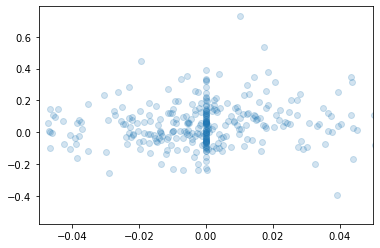

In [40]:
import matplotlib.pyplot as plt
plt.scatter(df_gain_income_recent_var['operatingExpenses_var'],df_gain_income_recent_var['quarterly gain'],alpha=0.2)
plt.xlim((-0.05,0.05))
plt.show()

We use the block below to compute the number of stocks enjoyed quarterly gain and suffered quarterly loss.

In [39]:
y = df_gain_income_recent_var['quarterly gain'] > 0
print(len(y[y==True]),'stocks enjoyed quarterly gain')
print(len(y[y==False]),'stocks suffered quarterly loss')
print('{:.2f} % of the stock produced gain'.format(306/(182+306)*100))

306 stocks enjoyed quarterly gain
182 stocks suffered quarterly loss
62.70 % of the stock produced gain


# scratch blocks below

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
# from sklearn.svm import SVC
# clf = SVC(random_state=0).fit(X,y)
# clf.score(X,y)
clf = LogisticRegression(random_state=0)
cv_results = cross_validate(clf,X,y,cv=3)
cv_results

{'fit_time': array([0.87605023, 0.06700373, 0.07200408]),
 'score_time': array([0.00900054, 0.02600145, 0.01000047]),
 'test_score': array([0.65269461, 0.64457831, 0.62650602])}

The performance of the model is not very impressive is it.  If I were to blindly guess that any stock produces quarterly gain, I could have been correct 63% of the time, which is not significantly lower than the accuracy of the model, i.e.,61-67%.

In [26]:
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled
clf = LogisticRegression(random_state=0)
cv_results = cross_validate(clf,X_scaled,y,cv=3)
cv_results

{'fit_time': array([0.06600356, 0.04000235, 0.02700162]),
 'score_time': array([0.00400043, 0.00200009, 0.00100017]),
 'test_score': array([0.63473054, 0.63855422, 0.63253012])}